<a href="https://colab.research.google.com/github/ngoc11224756/bank-customer-cart/blob/main/btn_UDAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install streamlit

In [1]:
import streamlit as st
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# File để ghi streamlit app trong Google Colab
with open("app.py", "w") as f:
    f.write('''
import streamlit as st
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

st.set_page_config(page_title="Bank Customer Classification", layout="wide")
st.title("\U0001F4C8 Bank Customer Classification using CART")

uploaded_file = st.file_uploader("Upload your bank-data.csv file", type=["csv"])
if uploaded_file:
    data = pd.read_csv(uploaded_file)
    st.subheader("Raw Data")
    st.dataframe(data.head())

    if 'id' in data.columns:
        data = data.drop("id", axis=1)

    categorical_cols = data.select_dtypes(include=["object"]).columns.tolist()
    label_encoders = {}
    for col in categorical_cols:
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])
        label_encoders[col] = le

    if "pep" not in data.columns:
        st.error("The dataset must contain a 'pep' target column.")
    else:
        X = data.drop("pep", axis=1)
        y = data["pep"]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        model = DecisionTreeClassifier(criterion="gini", max_depth=5, random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        st.subheader("Model Evaluation")
        st.write("**Accuracy:**", accuracy_score(y_test, y_pred))
        report_str = classification_report(y_test, y_pred)
        st.text("Classification Report:")
        st.code(report_str, language='text')

        st.subheader("Confusion Matrix")
        fig_cm, ax_cm = plt.subplots()
        cm = confusion_matrix(y_test, y_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax_cm)
        ax_cm.set_xlabel("Predicted")
        ax_cm.set_ylabel("Actual")
        st.pyplot(fig_cm)

        st.subheader("Decision Tree Visualization")
        fig_tree, ax_tree = plt.subplots(figsize=(20, 10))
        plot_tree(model, feature_names=X.columns, class_names=["No", "Yes"], filled=True, ax=ax_tree)
        st.pyplot(fig_tree)

        st.subheader("Try Prediction with New Data")
        input_data = {}
        int_columns = ["age", "children"]  # sửa tại đây nếu có thêm cột int khác

        for col in X.columns:
            if col in categorical_cols:
                le = label_encoders[col]
                categories = le.classes_
                selected = st.selectbox(f"{col}", options=categories)
                input_data[col] = le.transform([selected])[0]
            elif col in int_columns:
                val = st.number_input(f"{col}", value=int(X[col].mean()), step=1, format="%d")
                input_data[col] = int(val)
            else:
                val = st.number_input(f"{col}", value=float(X[col].mean()))
                input_data[col] = float(val)

        if st.button("Predict"):
            input_df = pd.DataFrame([input_data])
            prediction = model.predict(input_df)[0]

            if prediction == 1:
                st.success("Predicted class: **Yes**")
                st.markdown("🔍 **Khách hàng này có khả năng cao sẽ mua sản phẩm đầu tư PEP.** Bạn nên ưu tiên tiếp cận với các ưu đãi phù hợp.")
            else:
                st.success("Predicted class: **No**")
                st.markdown("ℹ️ **Khách hàng này có khả năng thấp sẽ mua PEP.** Bạn có thể cần chiến lược khác hoặc ưu tiên nhóm khách hàng khác.")
''')

# Hướng dẫn thêm để chạy trên Colab:
print("\n\u2705 Streamlit app code has been saved to app.py")
print("\nNow run the following in Colab to install dependencies:")



ModuleNotFoundError: No module named 'streamlit'

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving bank-data.csv to bank-data (1).csv


In [ ]:
# Assuming your file is named 'bank-data.csv'
import io
file_name = next(iter(uploaded))  # Get the filename from the uploaded dictionary
data = pd.read_csv(io.BytesIO(uploaded[file_name]))  # Read the file into a DataFrame

In [ ]:
#1.TIỀN XỬ LÝ DỮ LIỆU

# Encode các biến phân loại (categorical)
categorical_cols = data.select_dtypes(include=["object"]).columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Chia dữ liệu thành input X và target y
X = data.drop("pep", axis=1)
y = data["pep"]

# Tách dữ liệu train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Khởi tạo mô hình CART
model = DecisionTreeClassifier(
    criterion="gini",
    max_depth=7,
    max_features=None,
    min_samples_leaf=5,
    min_samples_split=2,
    splitter='best',
    random_state=42
)

# Huấn luyện mô hình
model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=7, min_samples_leaf=5, random_state=42)

Accuracy: 0.9083333333333333
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.91      0.92        66
           1       0.89      0.91      0.90        54

    accuracy                           0.91       120
   macro avg       0.91      0.91      0.91       120
weighted avg       0.91      0.91      0.91       120



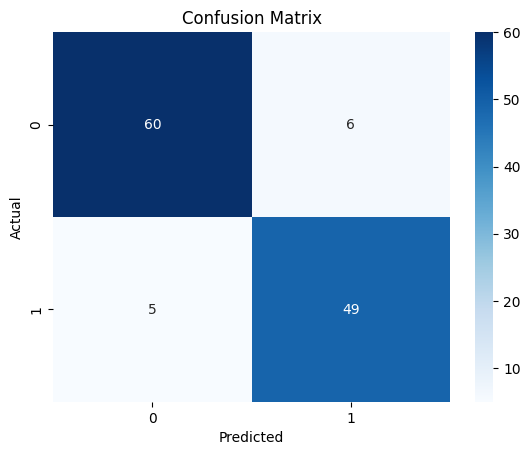

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Dự đoán
y_pred = model.predict(X_test)

# Đánh giá
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


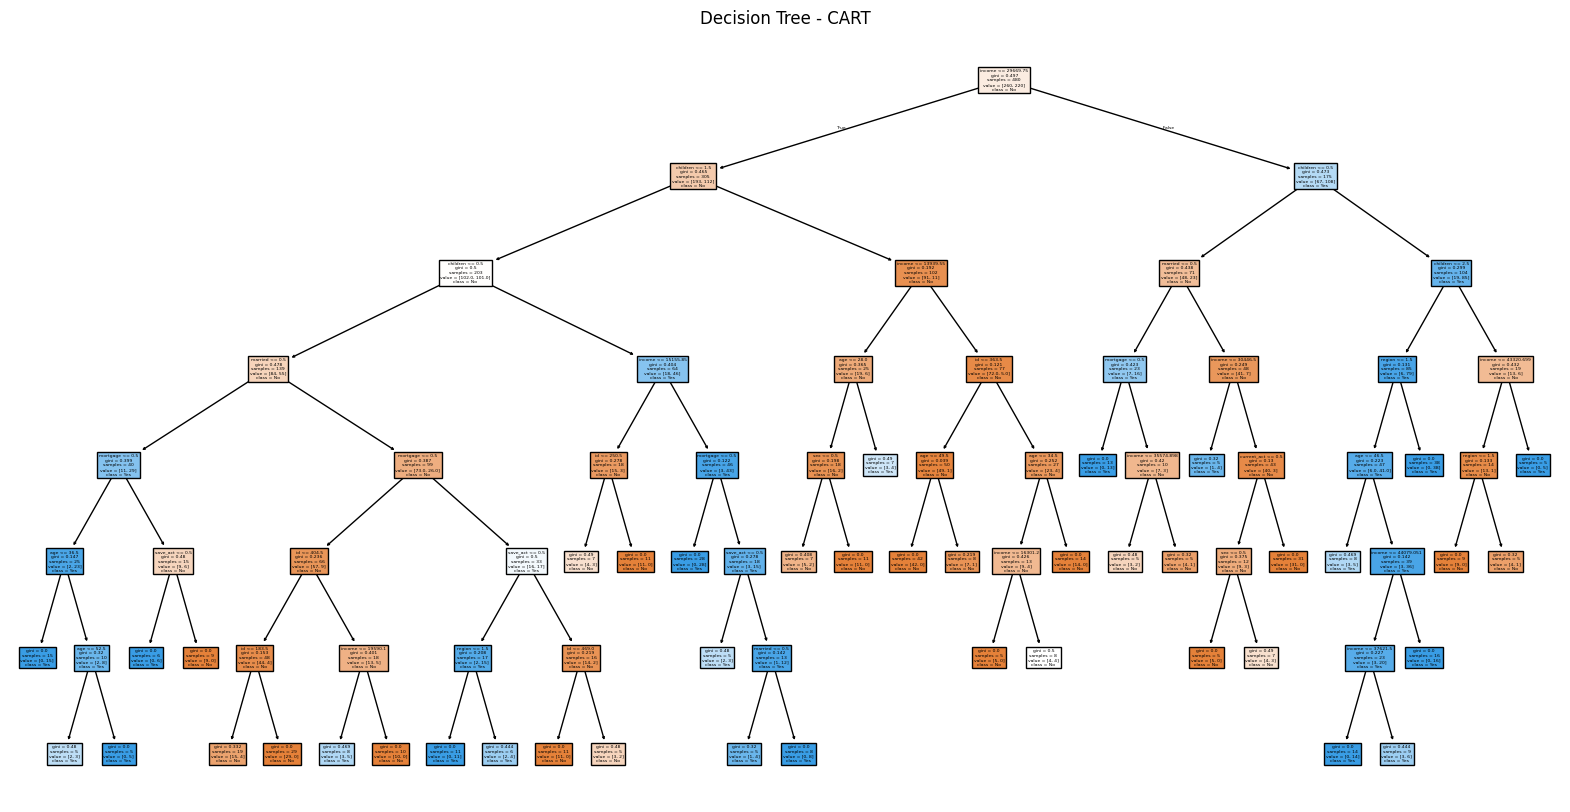

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(model, feature_names=X.columns, class_names=["No", "Yes"], filled=True)
plt.title("Decision Tree - CART")
plt.show()


In [ ]:
!ngrok authtoken 2vzHcruc10kCRpM0qixueitu9R2_3XV5vyPZJuHc5uoJcFVmu  # Replace with your actual authtoken

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
from pyngrok import ngrok

# Disconnect any existing tunnels
for tunnel in ngrok.get_tunnels():
    ngrok.disconnect(tunnel.public_url)
# Chạy app streamlit ngầm
!streamlit run app.py &> /dev/null &

# Tạo đường dẫn công khai
public_url = ngrok.connect(addr=8501)
print("App is live at:", public_url)


App is live at: NgrokTunnel: "https://c495-35-245-137-206.ngrok-free.app" -> "http://localhost:8501"
